# Forecast of client loss for the hospitality company 

# Content
1. [Project Description](#step_0)
2. [Data import](#step_1)
3. [Data preparation and Exploratory analysis](#step_2)
4. [Definition of ML-target based on the business target](#step_3)
5. [Models trainings](#step_4)
6. [Description of "ubrelaible" client](#step_5)
7. [General Conclusion](#step_6)

<a name="step_0"></a>
# Project Description

Hospitality company "As home" wants to incrase the costumers flow. For that purpose company added an option to book the room without downpayment, hovewer company has faced the losses of income in a case of booking cancellation. To solve this issue company wants to develop the System which will predict the booking cancelation. In case of possible cancelation of booking hospitality company client has to make a downpayment of 80% of cost of booking.

Project tasks are following:
1) Import the data, perform data preparation and conduct exploratory analyzis;

2) Calculate the business metric - the company's profit w/o deposits;

3) Develop the ML model:
- train the models;
- Select the best model and test it;
- calculate the potential profit to be made after apply of the model per year

4) Define the features of unreliable clients


<a name="step_1"></a>
# Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
train_df = pd.read_csv('hotel_train.csv')
test_df = pd.read_csv('hotel_test.csv')

<a name="step_2"></a>
# Data preparation and Exploratory analysis

In [4]:
train_df

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,84057,0,23.0,2016,December,53,30,2,4,2.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,December,53,31,2,3,2.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,1,7


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [6]:
train_df['arrival_date_month'] =  pd.to_datetime(train_df['arrival_date_month'],format = '%B')
train_df['arrival_date_month']= train_df['arrival_date_month'].dt.month
train_df

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,7,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,7,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,7,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,7,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,7,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,84057,0,23.0,2016,12,53,30,2,4,2.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,12,53,31,2,3,2.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,12,53,31,2,4,2.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,12,53,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,1,7


In [7]:
train_df = train_df.drop(columns = 'id')
train_df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,7.0,2015,7,27,1,0,1,1.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
1,0,14.0,2015,7,27,1,0,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,2
2,0,0.0,2015,7,27,1,0,2,2.0,0.0,...,0,0,0,C,0,0,Transient,0,0,2
3,0,9.0,2015,7,27,1,0,2,2.0,0.0,...,0,0,0,C,0,0,Transient,0,1,2
4,1,85.0,2015,7,27,1,0,3,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,0,23.0,2016,12,53,30,2,4,2.0,0.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,0,53.0,2016,12,53,31,2,3,2.0,0.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,0,7.0,2016,12,53,31,2,4,2.0,0.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,0,17.0,2016,12,53,30,2,5,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,7


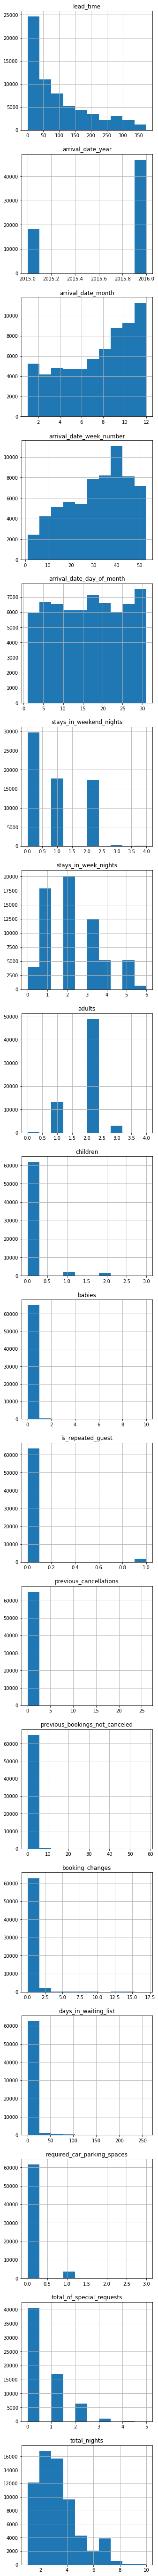

In [8]:
column_list_number = ['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
                     'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest',
                      'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
                      'required_car_parking_spaces','total_of_special_requests','total_nights']

fig, axs = plt.subplots(len(column_list_number), figsize=(5, 100))

for i in range(len(column_list_number)):
    train_df[column_list_number[i]].hist(ax=axs[i]).set_title(column_list_number[i])

In [9]:
column_list_object = []
for n in train_df.columns:
    if n in column_list_number:
        column_list_object = column_list_object
    elif n == 'is_canceled':
        column_list_object = column_list_object
    else:
        column_list_object.append(n)

In [10]:
for z in range(len(column_list_object)):
            print(train_df.groupby (column_list_object[z])['is_canceled'].count().sort_values(ascending=False),'\n')

meal
BB           51697
HB            7292
SC            5274
SC             515
FB             451
Name: is_canceled, dtype: int64 

country
PRT    28831
FRA     5974
GBR     5109
ESP     4900
DEU     3887
       ...  
NIC        1
PLW        1
PRY        1
PYF        1
ZWE        1
Name: is_canceled, Length: 155, dtype: int64 

distribution_channel
TA/TO        54454
Direct        6853
Corporate     3823
GDS             99
Name: is_canceled, dtype: int64 

reserved_room_type
A                   50501
D                    9387
E                    2448
F                    1213
B                     860
G                     592
C                     228
Name: is_canceled, dtype: int64 

customer_type
Transient          45493
Transient-Party    16703
Contract            2746
Group                287
Name: is_canceled, dtype: int64 



In [11]:
train_df['country'] =  train_df['country'].str.replace(' ', '')
train_df['meal'] =  train_df['meal'].str.replace(' ', '')
train_df['reserved_room_type'] =  train_df['reserved_room_type'].str.replace(' ', '')
train_df.groupby('country')['is_canceled'].count().sort_index()

country
ABW      1
AGO    140
ALB      7
AND      1
ARE     26
      ... 
VGB      1
VNM      5
ZAF     36
ZMB      1
ZWE      1
Name: is_canceled, Length: 155, dtype: int64

3.3344218062518207 days_in_waiting_list
259       10
236       35
224       10
215       21
207       15
       ...  
4         20
3         59
2          2
1          3
0      62005
Name: is_canceled, Length: 97, dtype: int64 
 0.9954161492587653


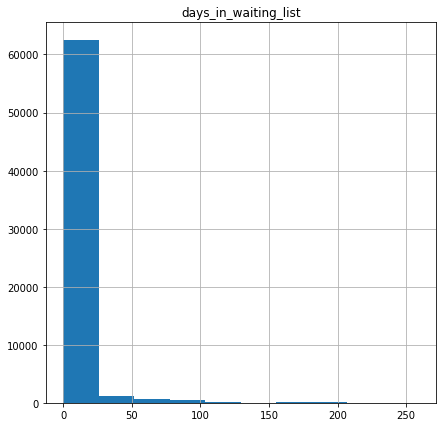

In [12]:
train_df['days_in_waiting_list'].hist(bins=10, figsize=(7,7))

plt.title('days_in_waiting_list')

print(train_df['days_in_waiting_list'].mean() ,train_df.groupby('days_in_waiting_list')['is_canceled'].count().sort_index(ascending=False),'\n',
train_df.query('days_in_waiting_list < 150')['is_canceled'].count()/train_df['days_in_waiting_list'].count())

In [13]:
train_df = train_df.query('days_in_waiting_list < 150')
train_df = train_df.reset_index(drop=True)

Text(0.5, 1.0, 'arrival_date_week_number')

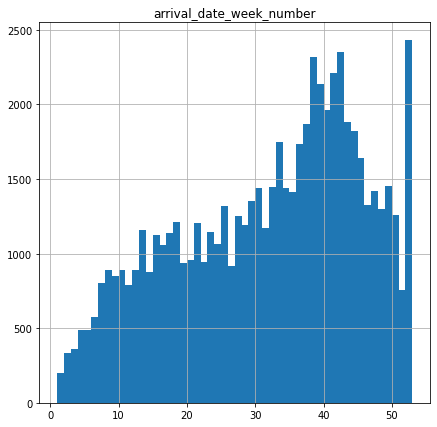

In [14]:
train_df['arrival_date_week_number'].hist(bins=52, figsize=(7,7))

plt.title('arrival_date_week_number')

Text(0.5, 1.0, 'arrival_date_month')

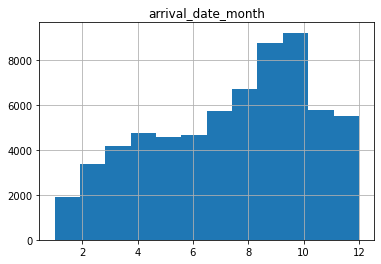

In [15]:
train_df['arrival_date_month'].hist(bins = 12,) 
plt.title('arrival_date_month')

**Based on histograms were revealed that the peak of demand was in last wekk of the year - most likely due to the new year holidays.**

Highest demand was in September/October

In [16]:
test_df

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,...,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,0,D,0,0,Transient,0,4,7


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [18]:
test_df['arrival_date_month'] =  pd.to_datetime(test_df['arrival_date_month'],format = '%B')
test_df['arrival_date_month']= test_df['arrival_date_month'].dt.month
test_df

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,1,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,1,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,1,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,1,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,1,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,8,35,31,2,4,2.0,...,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.0,2017,8,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.0,2017,8,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,8,35,31,2,5,2.0,...,0,0,0,D,0,0,Transient,0,4,7


In [19]:
test_df = test_df.drop(columns = 'id')
test_df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,1,74.0,2017,1,1,1,1,0,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,62.0,2017,1,1,1,2,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
2,1,62.0,2017,1,1,1,2,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
3,1,71.0,2017,1,1,1,2,2,1.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
4,1,172.0,2017,1,1,1,2,5,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,8,35,31,2,4,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,6
32408,0,21.0,2017,8,35,30,2,5,2.0,0.0,...,0,0,0,A,0,0,Transient,0,2,7
32409,0,23.0,2017,8,35,30,2,5,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,7
32410,0,34.0,2017,8,35,31,2,5,2.0,0.0,...,0,0,0,D,0,0,Transient,0,4,7


In [20]:
test_df['country'] =  test_df['country'].str.replace(' ', '')
test_df['meal'] =  test_df['meal'].str.replace(' ', '')
test_df['reserved_room_type'] =  test_df['reserved_room_type'].str.replace(' ', '')
test_df.groupby('country')['is_canceled'].count().sort_index()

country
ABW     1
AGO    63
ALB     4
AND     1
ARE    11
       ..
UZB     3
VEN     5
VNM     3
ZAF    34
ZWE     2
Name: is_canceled, Length: 143, dtype: int64

0.2623411082315192 days_in_waiting_list
223        1
185        2
183        1
175        1
165        1
       ...  
5          5
4          5
2          2
1          3
0      32235
Name: is_canceled, Length: 75, dtype: int64 
 0.9997531778353697


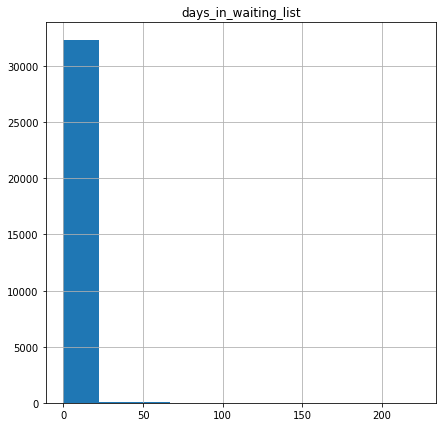

In [21]:
test_df['days_in_waiting_list'].hist(bins=10, figsize=(7,7))

plt.title('days_in_waiting_list')

print(test_df['days_in_waiting_list'].mean() ,test_df.groupby('days_in_waiting_list')['is_canceled'].count().sort_index(ascending=False),'\n',
test_df.query('days_in_waiting_list < 150')['is_canceled'].count()/test_df['days_in_waiting_list'].count())

In [22]:
test_df = test_df.query('days_in_waiting_list < 150')
test_df = test_df.reset_index(drop=True)

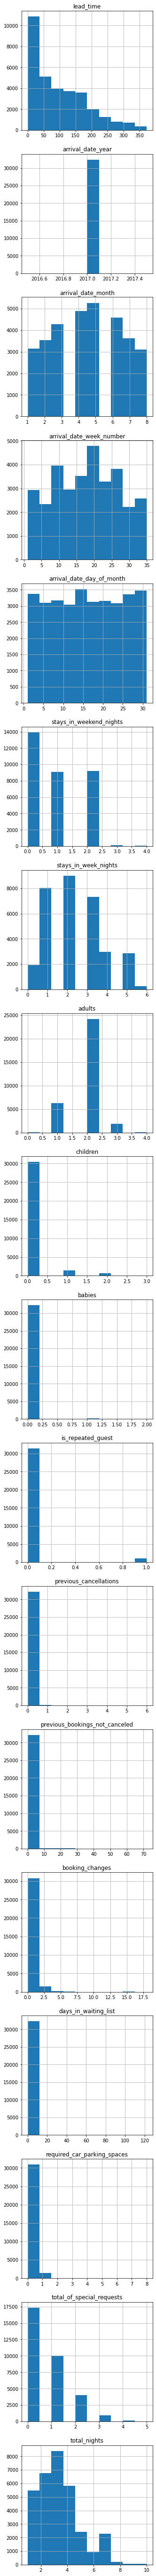

In [23]:
fig, axs = plt.subplots(len(column_list_number), figsize=(5, 100))

for i in range(len(column_list_number)):
    test_df[column_list_number[i]].hist(ax=axs[i]).set_title(column_list_number[i])

In [24]:
for z in range(len(column_list_object)):
    print(test_df.groupby (column_list_object[z])['is_canceled'].count().sort_values(ascending=False),'\n')

meal
BB    24678
SC     5293
HB     2397
FB       36
Name: is_canceled, dtype: int64 

country
PRT    9884
GBR    3927
FRA    3477
DEU    2375
ESP    1932
       ... 
SLV       1
STP       1
IMN       1
NCL       1
ABW       1
Name: is_canceled, Length: 143, dtype: int64 

distribution_channel
TA/TO        27077
Direct        3642
Corporate     1600
GDS             85
Name: is_canceled, dtype: int64 

reserved_room_type
A    23466
D     6121
E     1643
F      503
G      278
C      201
B      192
Name: is_canceled, dtype: int64 

customer_type
Transient          27458
Transient-Party     4422
Contract             359
Group                165
Name: is_canceled, dtype: int64 



**Conclusion**

**Based on the plotted histogram of df test the following information revealed:**

1) Most part of the clients a booking the room on period equal to three days and booking is made for two persons;

2) the higherdemand on the booking is april.

<a name="step_3"></a>
# Definition of ML-target based on the business target

Definition of initial information from hospitality company:

In [25]:
PREDICTION_SYSTEM_BUDGET = 400000

In [26]:
ROOM_A_INCOME = 1000
ROOM_B_INCOME = 800
ROOM_C_INCOME = 600
ROOM_D_INCOME = 550
ROOM_E_INCOME = 500
ROOM_F_INCOME = 450
ROOM_G_INCOME = 350

In [27]:
ROOM_A_CLEANING = 400
ROOM_B_CLEANING = 350
ROOM_C_CLEANING = 350
ROOM_D_CLEANING = 150
ROOM_E_CLEANING = 150
ROOM_F_CLEANING = 150
ROOM_G_CLEANING = 150

In [28]:
SUMMER_INCREASE = 1.4
summer_months = [6,7,8]
MIDSEASON_INCREASE = 1.2
midseason_months = [3,4,5,9,10,11]

In [29]:
# function for calculation of price and cleaning cost
def profit (room_type,qty_days):
    cost_per_night=0
    cleaning_cost = 0
    if room_type == 'A':
        cost_per_night = ROOM_A_INCOME
        cleaning_cost = ROOM_A_CLEANING
    elif room_type == 'B':
        cost_per_night = ROOM_B_INCOME 
        cleaning_cost = ROOM_B_CLEANING
    elif room_type == 'C':
        cost_per_night = ROOM_C_INCOME 
        cleaning_cost = ROOM_C_CLEANING
    elif room_type == 'D':
        cost_per_night = ROOM_D_INCOME
        cleaning_cost = ROOM_D_CLEANING
    elif room_type == 'E':
        cost_per_night = ROOM_E_INCOME 
        cleaning_cost = ROOM_E_CLEANING
    elif room_type == 'F':
        cost_per_night = ROOM_F_INCOME 
        cleaning_cost = ROOM_F_CLEANING
    else:
        cost_per_night = ROOM_G_INCOME
        cleaning_cost = ROOM_G_CLEANING
    if qty_days > 2 :
        total_price = cost_per_night * qty_days
        cleaning_cost =  (math.ceil(qty_days/2) *cleaning_cost ) 
    else:
        total_price = cost_per_night * qty_days 
        
    return(total_price,cleaning_cost)        
    

In [30]:
# Function for calculation of deposit
def reservation (room_type):
    cost_per_night=0
    cleaning_cost = 0
    if room_type == 'A':
        cost_per_night = ROOM_A_INCOME
        cleaning_cost = ROOM_A_CLEANING
    elif room_type == 'B':
        cost_per_night = ROOM_B_INCOME 
        cleaning_cost = ROOM_B_CLEANING
    elif room_type == 'C':
        cost_per_night = ROOM_C_INCOME 
        cleaning_cost = ROOM_C_CLEANING
    elif room_type == 'D':
        cost_per_night = ROOM_D_INCOME
        cleaning_cost = ROOM_D_CLEANING
    elif room_type == 'E':
        cost_per_night = ROOM_E_INCOME 
        cleaning_cost = ROOM_E_CLEANING
    elif room_type == 'F':
        cost_per_night = ROOM_F_INCOME 
        cleaning_cost = ROOM_F_CLEANING
    else:
        cost_per_night = ROOM_G_INCOME
        cleaning_cost = ROOM_G_CLEANING
    total_profit = cost_per_night
    cleaning_cost = cleaning_cost
    return(total_profit,cleaning_cost)   

In [31]:
# function for income calculation 
def income (df):
    increase = 1
    if df['arrival_date_month'] in summer_months:
        increase *=SUMMER_INCREASE
    elif df['arrival_date_month'] in midseason_months:
        increase *=MIDSEASON_INCREASE
    if df['is_canceled'] == 0:
        income, costs = profit(df['reserved_room_type'],df['total_nights'])
        total_income = increase * income - costs
    else:
        income, costs = reservation(df['reserved_room_type'])
        total_income = - costs
    return(total_income)    

**Calculation of minimal profit**

In [32]:
profit_test_df = test_df.copy()

In [33]:
profit_test_df['profit']=profit_test_df.apply(income,axis=1)

In [34]:
profit_test = profit_test_df['profit'].sum()

In [35]:
profit_test

49038900.0

**Coclusion**

After development of prediction system the hotel prfit shall be not less than 49 038 900

<a name="step_4"></a>
# Models training


In [36]:
# splitting of df of features and target
target = train_df['is_canceled']
features = train_df.drop(columns = 'is_canceled')

test_target = test_df['is_canceled']
test_features = test_df.drop(columns = 'is_canceled')

features encoding

In [37]:
features_to_encode = features[column_list_object]
test_features_to_encode = test_features[column_list_object]

train_qty = features_to_encode['meal'].count()

In [38]:
train_qty

64930

In [39]:
all_to_encode = features_to_encode.append(test_features_to_encode)

In [40]:
encoder = OrdinalEncoder() 
encoder.fit(all_to_encode)
all_to_encode = encoder.transform(all_to_encode)
all_ordinal = pd.DataFrame(all_to_encode)

In [41]:
features_ordinal = all_ordinal[:train_qty]
features_ordinal.columns = features_to_encode.columns
features_ordinal = features_ordinal.reset_index(drop=True)
test_features_ordinal = all_ordinal[train_qty:]
test_features_ordinal.columns = test_features[column_list_object].columns
test_features_ordinal = test_features_ordinal.reset_index(drop=True)

In [42]:
features[column_list_object] = features_ordinal
test_features[column_list_object] = test_features_ordinal

**For the model evaluation it's proposed to use AUC ROC and AUC ROC curve**

**Logistic Regression model**

In [43]:
train_qty_lr = train_df['is_canceled'].count()

df_lr = train_df.append(test_df)

df_lr = pd.get_dummies(df_lr,drop_first=True)

train_lr = df_lr[:train_qty_lr]
train_lr = train_lr.reset_index(drop=True)
test_lr = df_lr[train_qty_lr:]
test_lr = test_lr.reset_index(drop=True)

test_features_ordinal = all_ordinal[train_qty:]

target_lr = train_lr['is_canceled']
features_lr = train_lr.drop(columns = 'is_canceled')

test_target_lr = test_lr['is_canceled']
test_features_lr = test_lr.drop(columns = 'is_canceled')

In [44]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345,class_weight='balanced')

In [45]:
model_lr.fit(features_lr,target_lr)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [46]:
roc_auc_cv_lr = cross_val_score(model_lr,features_lr,target_lr,scoring='roc_auc').mean()
cross_val_score(model_lr,features_lr,target_lr,scoring= 'roc_auc').mean()

0.8079342448119394

In [47]:
predictions_lr = model_lr.predict(test_features_lr)

In [48]:
probabilities_lr = model_lr.predict_proba(test_features_lr)
roc_auc_lr = roc_auc_score(test_target_lr,probabilities_lr[:, 1])
roc_auc_lr

0.828584187585847

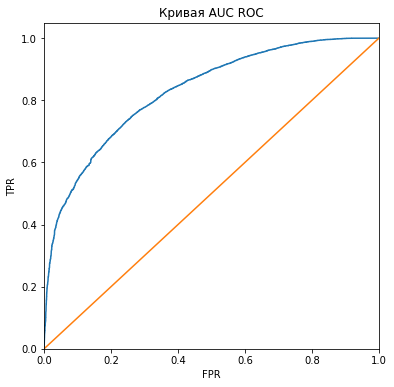

In [49]:
probabilities_lr = model_lr.predict_proba(test_features_lr)
precision, recall, thresholds = roc_curve(test_target_lr, probabilities_lr[:, 1])


plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая AUC ROC')
plt.show() 

**RandomForestClassifier Model**

In [50]:
rc_score = make_scorer(roc_auc_score)

In [51]:
parameters = { 'n_estimators': range (10, 71, 10),
              'max_depth': range (1,100,10)}

model_rf_a = RandomizedSearchCV(RandomForestClassifier(random_state=12345),parameters,scoring='roc_auc',random_state=12345)

In [52]:
model_rf_a.fit(features, target)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'max_depth': range(1, 100, 10),
                                        'n_estimators': range(10, 71, 10)},
                   random_state=12345, scoring='roc_auc')

In [53]:
print(model_rf_a.best_params_)
roc_auc_cv_rf = model_rf_a.best_score_
model_rf_a.best_score_

{'n_estimators': 50, 'max_depth': 1}


0.6588157493124985

In [54]:
model_rf = RandomForestClassifier(n_estimators=10,max_depth=11,random_state=12345)

In [55]:
model_rf.fit(features,target)

RandomForestClassifier(max_depth=11, n_estimators=10, random_state=12345)

In [56]:
predictions_rf = model_rf.predict(test_features)

In [57]:
accuracy_rf = model_rf.score(test_features, test_target)
accuracy_rf

0.7552462658930996

In [58]:
probabilities_rf = model_rf.predict_proba(test_features)
roc_auc_rf = roc_auc_score(test_target,probabilities_rf[:, 1])
roc_auc_rf

0.8121421679066092

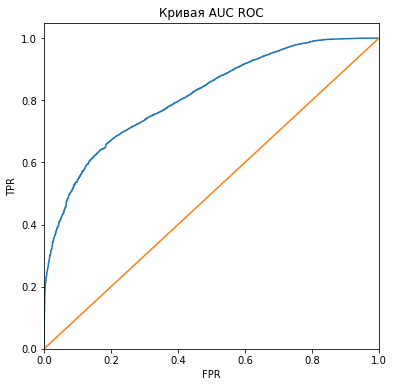

In [59]:
probabilities_rf = model_rf.predict_proba(test_features)
precision, recall, thresholds = roc_curve(test_target, probabilities_rf[:, 1])


plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая AUC ROC')
plt.show() 

**DecisionTreeClassifier Model**

In [60]:
parameters = { 'max_depth': range (1,100,10)}

model_dt_a = GridSearchCV(DecisionTreeClassifier(random_state=12345), parameters, scoring ='roc_auc')

In [61]:
model_dt_a.fit(features, target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'max_depth': range(1, 100, 10)}, scoring='roc_auc')

In [62]:
print(model_dt_a.best_params_)
model_dt_a.best_score_
roc_auc_cv_dt = model_dt_a.best_score_

{'max_depth': 11}


In [63]:
model_dt = DecisionTreeClassifier(max_depth=11,random_state=12345)

In [64]:
model_dt.fit(features, target)

DecisionTreeClassifier(max_depth=11, random_state=12345)

In [65]:
predictions_dt = model_dt.predict(test_features)

In [66]:
probabilities_dt = model_dt.predict_proba(test_features)
roc_auc_dt = roc_auc_score(test_target,probabilities_dt[:, 1])
roc_auc_dt

0.8032109800857434

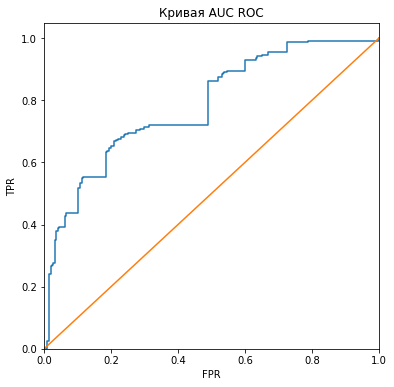

In [67]:
probabilities_dt = model_dt.predict_proba(test_features)
precision, recall, thresholds = roc_curve(test_target, probabilities_dt[:, 1])


plt.figure(figsize=(6, 6))
plt.step( precision,recall, where='post')
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая AUC ROC')
plt.show() 

**Selection of best model and testing it**

In [68]:
prediction_list = [predictions_lr,predictions_rf,predictions_dt]
auc_roc_cv_list = [roc_auc_cv_lr,roc_auc_cv_rf,roc_auc_cv_dt]
model_list = [model_lr,model_rf,model_dt]

In [69]:
models_df = pd.DataFrame({'auc_roc' :auc_roc_cv_list, 'model': model_list })

In [70]:
models_df.sort_values(by = 'auc_roc', ascending = False)

,auc_roc,model
0,0.807934,"LogisticRegression(class_weight='balanced', ra..."
1,0.658816,"(DecisionTreeClassifier(max_depth=11, max_feat..."
2,0.651199,"DecisionTreeClassifier(max_depth=11, random_st..."


In [71]:
best_score = 0
for i in range(len(model_list)):
    if auc_roc_cv_list[i].mean() > best_score:
        best_score = auc_roc_cv_list[i].mean()
        best_model = model_list[i] 
        best_prediction = prediction_list[i] 
        
print(best_score,best_model)

0.8079342448119394 LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')


In [72]:
best_prediction = pd.Series(best_prediction)

In [73]:
prediction_test_profit_df = test_df.copy()
prediction_test_profit_df['prediction'] = best_prediction

In [74]:
def tptn (df):
    if df['prediction'] == 0:
        if df['prediction'] == df['is_canceled']:
            value = 'TN'
        else:
            value = 'FN'
    else:
        if  df['prediction'] == df['is_canceled']:
            value = 'TP'
        else:
            value = 'FP'
    return(value)

In [75]:
prediction_test_profit_df['check'] = prediction_test_profit_df.apply(tptn,axis=1)

In [76]:
def final_profit (df):
    increase = 1
    if df['arrival_date_month'] in summer_months:
        increase *=SUMMER_INCREASE
    elif df['arrival_date_month'] in midseason_months:
        increase *=MIDSEASON_INCREASE
    if df['check'] == 'TN':
        income, costs = profit(df['reserved_room_type'],df['total_nights'])
        total_income = increase * income - costs
    elif df['check'] == 'FP':
        income, costs = profit(df['reserved_room_type'],df['total_nights'])
        total_income = increase * income - costs        
    elif df['check'] == 'FN':
        income, costs =  reservation(df['reserved_room_type'])
        total_income = - costs
    else:
        income, costs =  reservation(df['reserved_room_type'])
        total_income = (increase*income + costs)*0.8 - costs
    return(total_income)   
        

In [77]:
prediction_test_profit_df['profit'] = prediction_test_profit_df.apply(final_profit,axis=1)

In [78]:
profit_predict = prediction_test_profit_df['profit'].sum()

In [79]:
clean_profit_predict = profit_predict - PREDICTION_SYSTEM_BUDGET 

In [80]:
clean_profit_predict

58092324.0

In [81]:
add_income = clean_profit_predict -  profit_test

In [82]:
add_income

9053424.0

**Model ROI conclusion**

Based on the calculation above it's possible to conclude - prediction system will have positive ROI index in one year, more over it additionally will lead to additional profit equal to 907 432 

<a name="step_5"></a>
# Description of unrelaible client

In [83]:
# create two df with cancelled booking and w/o cancelled bookings
canceled_df = train_df.query('is_canceled == 1').append( test_df.query('is_canceled == 1'))
not_canceled_df = train_df.query('is_canceled == 0').append( test_df.query('is_canceled == 0'))

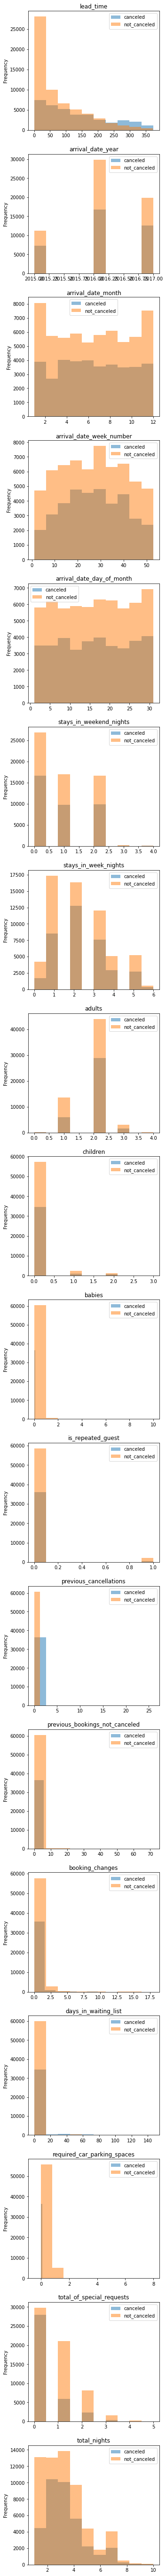

In [84]:
# histogram plotting for comparison of data 
df_list = [canceled_df,not_canceled_df]

fig, axs = plt.subplots(len(column_list_number), figsize=(5, 100))

for i in range(len(column_list_number)):
    for r in df_list:
        if r['is_canceled'].sum() == 0 :
            not_canceled_df[column_list_number[i]].plot(kind = 'hist', ax=axs[i],alpha=0.5,label='not_canceled', legend = True).set_title(column_list_number[i])
        
        else:
            
            canceled_df[column_list_number[i]].plot(kind = 'hist', ax=axs[i],alpha=0.5,label='canceled',legend = True).set_title(column_list_number[i])           

In [85]:
# loop for compariosn of categorical columns
for z in range(len(column_list_object)):
    for i in df_list:
        if i['is_canceled'].sum() == 0 :
            print('not canceled')
            print(i.groupby (column_list_object[z])['is_canceled'].count().sort_values(ascending=False),'\n')
        else: 
            print('canceled')
            print(i.groupby (column_list_object[z])['is_canceled'].sum().sort_values(ascending=False),'\n')

canceled
meal
BB    28573
SC     4031
HB     3576
FB      325
Name: is_canceled, dtype: int64 

not canceled
meal
BB    47545
SC     7051
HB     6071
FB      162
Name: is_canceled, dtype: int64 

canceled
country
PRT    22367
GBR     2007
FRA     1733
ESP     1695
ITA     1258
       ...  
ALB        1
LIE        1
MCO        1
MUS        1
SYC        1
Name: is_canceled, Length: 125, dtype: int64 

not canceled
country
PRT    16198
FRA     7678
GBR     7022
ESP     5136
DEU     5118
       ...  
SMR        1
KNA        1
KIR        1
GUY        1
ZWE        1
Name: is_canceled, Length: 160, dtype: int64 

canceled
distribution_channel
TA/TO        33420
Direct        1811
Corporate     1241
GDS             33
Name: is_canceled, dtype: int64 

not canceled
distribution_channel
TA/TO        47819
Direct        8677
Corporate     4182
GDS            151
Name: is_canceled, dtype: int64 

canceled
reserved_room_type
A    29047
D     5003
E     1161
F      512
B      344
G      306
C      1

In [86]:
canceled_df['lead_time'].median()

108.0

In [87]:
not_canceled_df['lead_time'].median()

45.0

**Description of unrelaible client:**

1) Client type - "not related to corporate contract or group booking";

2) Mostly booking of rooms type -  A; Reliable clients are also booking the this room category mostly, but only this this, D type rooms also.

3) Client Counrty - Portugal; 

4) Booking option: BB;

5) Total quantity of nights - 2 / 3;

6) Most likely booking to be made prior to the chechk in (108 days in advance).

7) Quantity of adult guests 2 

8) клиенты, забронировавшие номер через корпоративное бронирование или групповое  большей степенью вероятности не отменят заказ, следовательно, канал поступления ненадежного клиента - вероятнее всего  TA/TO  , но не корпоративный и не групповой.

9) Clients didn't request a parking spot

<a name="step_6"></a>

# General Conclusion

During the analyzis of the booking system, the model was built, which allow hotel to increase the profit.

Total profit is 58 092 324, it is higher than than the profit before the system integration and it also cover the cost for the system development. 

The realization of such system is definetely worth it.